>  ***To be merged in the original notebook***

## Part 2.2 Spectral-based novelty by madmom

Madmom is a python toolbox that does some state-of-the-art rhythm processing for you. The repository is here (along with some tutorials):

https://github.com/CPJKU/madmom

In order to get better novelty features, you can use the code in the following tutorial as starting point:

https://github.com/CPJKU/madmom_tutorials/blob/master/onset_detection.ipynb

You can **run this tutorial as an addition, if you want to understand more** about state-of-the-art signal processing.

In order to use madmom in colab, I have to install it as follows, and to restart the runtime...which means this is better done in a separate python notebook. In order to re-import all libraries and create all needed variables again this separate notebook should start as:



In [1]:
# Install python library madmom, for onset detection and beat tracking
!pip install --user --force-reinstall madmom

  Using cached madmom-0.16.1.tar.gz (20.0 MB)
  Using cached numpy-1.21.2-cp38-cp38-win_amd64.whl (14.0 MB)
  Using cached scipy-1.7.1-cp38-cp38-win_amd64.whl (33.7 MB)
  Using cached Cython-0.29.24-cp38-cp38-win_amd64.whl (1.7 MB)
  Using cached mido-1.2.10-py2.py3-none-any.whl (51 kB)
  Created wheel for madmom: filename=madmom-0.16.1-cp38-cp38-win_amd64.whl size=20014348 sha256=92ba3cce9c57cd62ad711f05f1f69fe04452512a035b2d04e2e9250d6a51de20
  Stored in directory: c:\users\tatia\appdata\local\pip\cache\wheels\a2\fc\0f\2d5569ea771ee70a9bf321a72744b4507eb85ff540d82b54eb
Successfully built madmom
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: mido
    Found existing installation: mido 1.2.10
    Uninstalling mido-1

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install pydub

In [3]:
import librosa
import librosa.display
import os, sys
from scipy import signal
import pydub
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import madmom
from scipy.ndimage.filters import maximum_filter
import IPython.display as ipd

filename = 'labdata/drumloop120_mono.wav'#put your file
root_path = ''#put your path

In [4]:
_, sample_rate = madmom.io.audio.load_wave_file(filename)

In [5]:
def moving_average(x, w):
    # w: avg window size
    return np.convolve(x, np.ones(w), 'same') /((2*w)+1) 

In [23]:
# use madmom to get the spectrogram in log scale
# a short window (30ms, and 10ms hop size)
frame_size = int(sample_rate * 30 * 1e-3)
hop_size = int(sample_rate * 10 * 1e-3)
spec = madmom.audio.spectrogram.LogarithmicSpectrogram(filename, mul=100, frame_size=frame_size, hop_size=hop_size, fft_size=8192)
# calculate the difference
diff = np.diff(spec, axis=0)
# keep only the positive differences
pos_diff = np.maximum(0, diff)
# sum everything to get the spectral flux
sf = np.sum(pos_diff, axis=1)

In [24]:
# local avg
avg = moving_average(sf, 10)
# obtain values above avg
pos_sf = np.maximum(0, sf-avg)
# normalize so that max is 1
norm_sf = (pos_sf - np.min(pos_sf))/np.ptp(pos_sf)

In [25]:
# obtain onsets
# by thresholding the obtained function, with a threshold of 0.5. 
# (Hint: the stem function from the matplotlib does that plotting for you)
norm_sf_thr = [1 if item >= 0.5 else 0 for item in norm_sf]
t = list(range(len(norm_sf)))

Text(0.5, 0, 'Time [s]')

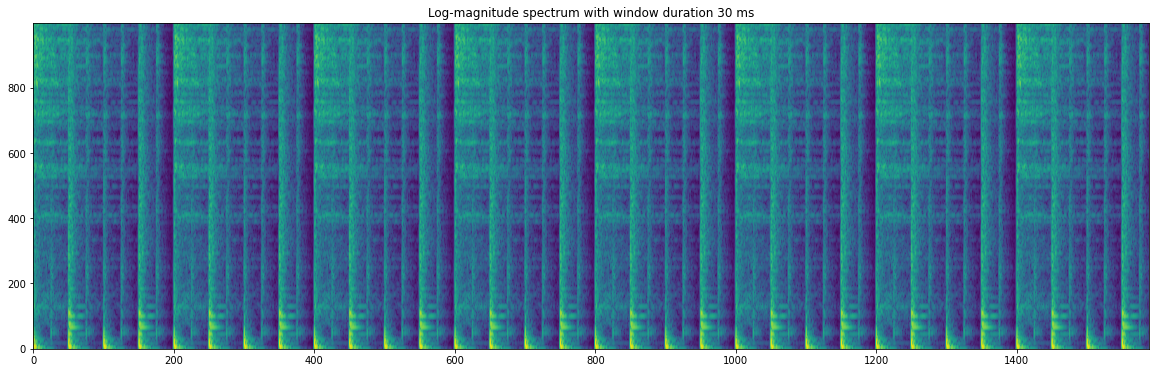

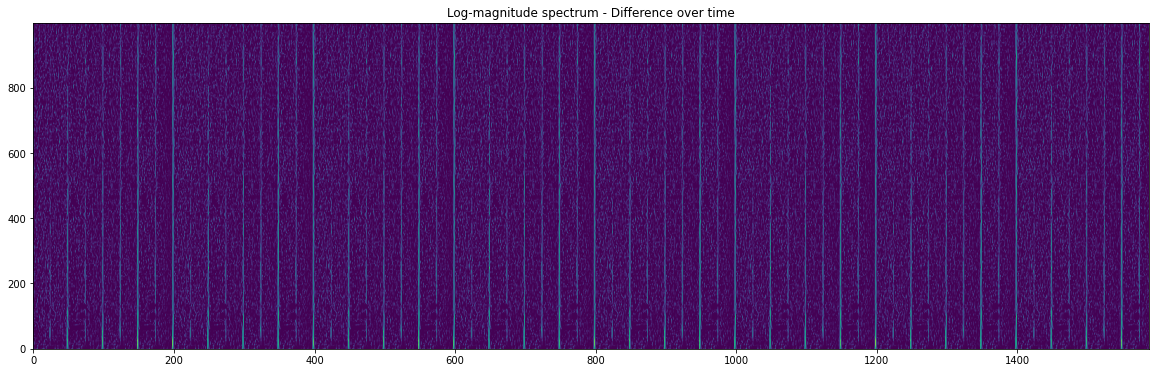

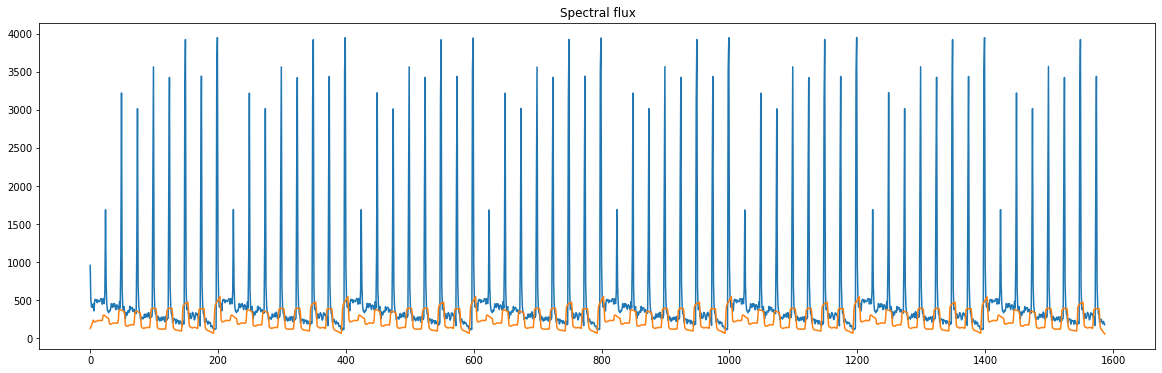

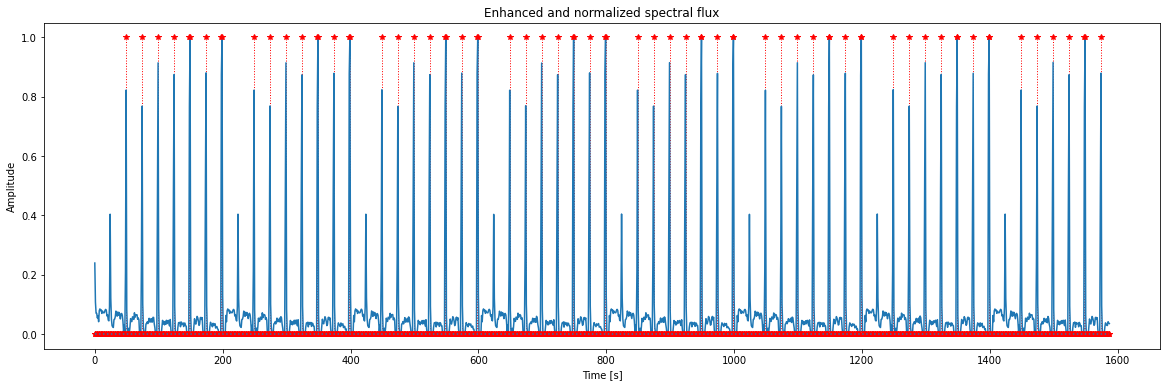

In [26]:
# plot
plt.rcParams["figure.figsize"] = (20,6)
# spectrogram
plt.figure()
plt.imshow(spec[:, :1000].T, origin='lower', aspect='auto')
plt.title('Log-magnitude spectrum with window duration 30 ms')
# plt.ylabel('Frequency [kHz]')
# plt.xlabel('Time [s]')
# diff over time
plt.figure()
plt.imshow(pos_diff[:, :1000].T, origin='lower', aspect='auto')
plt.title('Log-magnitude spectrum - Difference over time')
# plt.ylabel('Frequency [kHz]')
# plt.xlabel('Time [s]')
# spec flux
plt.figure()
plt.plot(sf)
plt.plot(avg, color='tab:orange')
plt.title('Spectral flux')
# plt.ylabel('Amplitude')
# plt.xlabel('Time [s]')
# spec func
plt.figure()
plt.plot(norm_sf)
markerline, stemlines, baseline = plt.stem(t, norm_sf_thr, ':', '*', 'C0:')
plt.setp(stemlines, 'color', 'r', 'linewidth', 1)
plt.setp(markerline, 'color', 'r', 'linewidth', 1)
plt.title('Enhanced and normalized spectral flux')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')

## Part 2.4 Beat Tracking

In this part you will use two beat trackers, which are available in python:



1.   The librosa beat tracker, which is the dynamic programming approach presented in the book. An example for how to run the librosa beat tracker: https://musicinformationretrieval.com/beat_tracking.html

2.   And the madmom beat tracker, which is using deep learning. 

Apply both beat trackers to audio examples having the following three characteristics:

1. stable tempo, strong onsets (for instance, the drum loop example) 
2. instable tempo, strong onsets (for instance, the cretansyrtos) 
3. weak energy onsets (for instance, a string quartet or a choir performance) 

Provide plots for the waveform with the beats overlaid (using vlines or stem). Also listen to the beat tracking results, which you can do with code that looks somewhat as follows:



In [0]:
import IPython.display as ipd
clicks = librosa.clicks(beat_times, sr=sr, length=len(x))
ipd.Audio(x + clicks, rate=sr)

For tracking with madmom, your code should look someshat as shown below. Note that in order to run madmom, I need to install it with the --force-install option, so it might be better to do that in a separate python notebook. A nice example that applies both librosa and madmom is here: https://www.analyticsvidhya.com/blog/2018/02/audio-beat-tracking-for-music-information-retrieval/

In [0]:
import madmom
proc = madmom.features.beats.DBNBeatTrackingProcessor(fps=100)
act = madmom.features.beats.RNNBeatProcessor()(os.path.join(root_path,filename1))
beat_times = proc(act)


Report what differences you observe (mainly by listening to the audio with the clicks for the beats) between the beat tracking outputs obtained from the two algorithms. Why do you think these differences emerge? (Given what you know from the book chapter and the from example on the analyticsvidhya website)

The plot of waveform and beats I get for the cretansyrtos example using librosa:

![](https://drive.google.com/uc?id=1l1YtJjrCHzaGUDEQ9O4UBafarf983CvW)

The plot of waveform and beats I get for the cretansyrtos example using madmom:

![](https://drive.google.com/uc?id=1L5LHO2EwgHgg8ypuj57gaj2j0eboCa5k)